In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def read_raw_image(url, rows, cols):
    fd = open(url, 'rb')
    file = np.fromfile( fd, dtype=np.uint8, count=rows*cols )
    fd.close()

    return file.reshape((rows, cols))

def show_images_with_plt( datas, cols, cmap ):
    plt.figure(num=None, figsize=(18, 12), dpi=94 )

    for index, data in enumerate(datas):
        plt.subplot( len(datas)/cols+1, cols, index+1 )
        plt.axis("off")
        plt.title(data["title"])
        plt.imshow( data["image"], cmap=cmap, vmin=0, vmax=255 )

def show_images_hist( datas, cols ):
    plt.figure(num=None, figsize=(18, 4), dpi=94 )
    for index, data in enumerate(datas):
        plt.subplot( len(datas)/cols+1, cols, index+1 )
        plt.hist( data["image"].ravel(), bins=256, range=( 0, 255 ))
        plt.title(data["title"])
def show_images_cdf( datas, cols ):
    plt.figure(num=None, figsize=(18, 4), dpi=94 )
    for index, data in enumerate(datas):
        hist, bin_edges = np.histogram(data["image"], bins=256, range=(0, 255))
        cdf = np.cumsum(hist/256/256)
        plt.subplot( len(datas)/cols+1, cols, index+1 )
        plt.plot(cdf)
        plt.title(data["title"] + "\nSuggest threshold: " + str(np.where(cdf > 0.70)[0][0]))

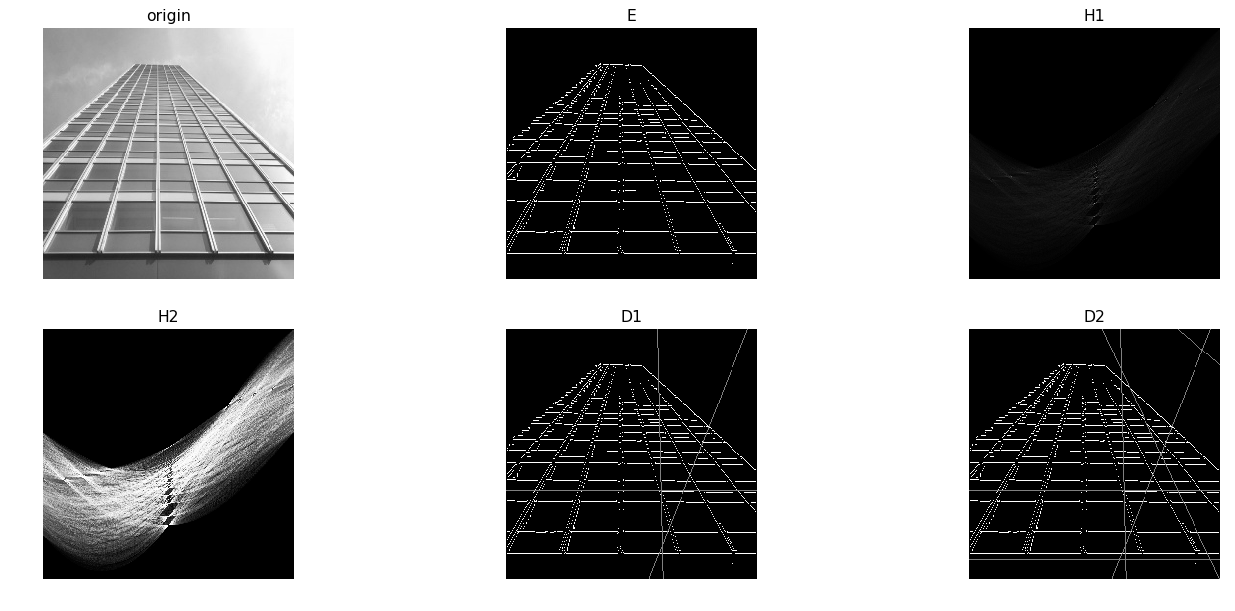

In [231]:
datas = [
    {
        "title":"origin",
        "image": read_raw_image( "hw4/code/raw/sample1.raw", 256, 256 )
    },
    {
        "title":"E",
        "image": read_raw_image( "hw4/code/problem1/E.raw", 256, 256 )
    },
    {
        "title":"H1",
        "image": read_raw_image( "hw4/code/problem1/H1.raw", 618,618 )
    },
    {
        "title":"H2",
        "image": read_raw_image( "hw4/code/problem1/H2.raw", 618,618 )
    },
    {
        "title":"D1",
        "image": read_raw_image( "hw4/code/problem1/D1.raw", 256, 256)
    },
    {
        "title":"D2",
        "image": read_raw_image( "hw4/code/problem1/D2.raw", 256, 256)
    }
]

show_images_with_plt( datas, 3, plt.cm.gray )